In [20]:
# make 100 cuneiform svg characters with flat

In [21]:
!pip install flat

distutils: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9/UNKNOWN
sysconfig: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9
user = False
home = None
root = None
prefix = None
distutils: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9/UNKNOWN
sysconfig: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9
user = False
home = None
root = None
prefix = None


In [22]:
import os.path

In [23]:
from flat import document, shape, rgba

In [24]:
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))

In [25]:
!pip install https://github.com/aparrish/bezmerizing/archive/master.zip

distutils: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9/UNKNOWN
sysconfig: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9
user = False
home = None
root = None
prefix = None
  Using cached https://github.com/aparrish/bezmerizing/archive/master.zip
distutils: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9/UNKNOWN
sysconfig: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9
user = False
home = None
root = None
prefix = None


In [36]:
from bezmerizing import Polyline

In [37]:
import numpy as np

In [38]:
from numpy.random import uniform, normal, choice

In [39]:
np.linspace([0, 50], [40, 10], 7)

array([[ 0.        , 50.        ],
       [ 6.66666667, 43.33333333],
       [13.33333333, 36.66666667],
       [20.        , 30.        ],
       [26.66666667, 23.33333333],
       [33.33333333, 16.66666667],
       [40.        , 10.        ]])

In [40]:
p = Polyline(np.linspace([10, 50], [90, 50], 10))

In [1]:
p.fancy_curve(thicknesses=[7, 4, 2, 1])

NameError: name 'p' is not defined

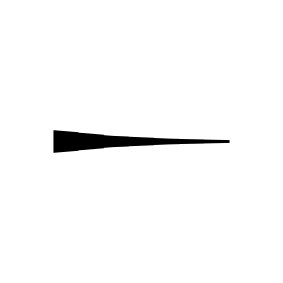

In [47]:
d = document(100, 100, 'mm')
page = d.addpage()
brush = shape().nostroke().fill(rgba(0, 0, 0, 255))
page.place(brush.polygon(p.fancy_curve(thicknesses=[8, 4, 2, 1])))
show(page)

In [48]:
from itertools import product
import random
all_positions = list(product(range(4), range(4)))


In [49]:
cds = list(product(range(4), range(4))) 
lns = list(product(cds, cds)) 
ln_p = np.ones(len(lns)) 
for i, ln in enumerate(lns): 
    if ln[0][0] == ln[1][0]: # if x coords are the same
        ln_p[i] += 5 
    if ln[0] == ln[1]: # if beg/end are the same
        ln_p[i] = 0 
ln_p /= ln_p.sum() # normalize
lns[np.random.choice(np.arange(len(lns)), p=ln_p)]

((1, 3), (0, 2))

In [51]:
save_path = "../Codex/_project/_images/glyphs/"
for i in range(800):
    lines = []
    linenumber = choice([1, 2, 3, 4, 6, 8], p=[ 0.01, 0.09, 0.6, 0.2, 0.05, 0.05])
    for n in range(linenumber):
        coords = lns[np.random.choice(np.arange(len(lns)), p=ln_p)]
        lines.append(Polyline(np.linspace(coords[0], coords[1], 10)).scale(25))
    d = document(100, 100, 'mm')
    page = d.addpage()
    brush = shape().nostroke().fill(rgba(0, 0, 0, 255))
    for line in lines:
        page.place(brush.polygon(line.fancy_curve(thicknesses=[7, 4, 2, 1])))
    fileName = "glyph_"+str(i)
    namePath = os.path.join(save_path, fileName+".svg")
    with open(namePath, "wb") as fh:
        fh.write(page.svg())